In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
X, y = sklearn.datasets.make_moons(200, noise = 0.15)

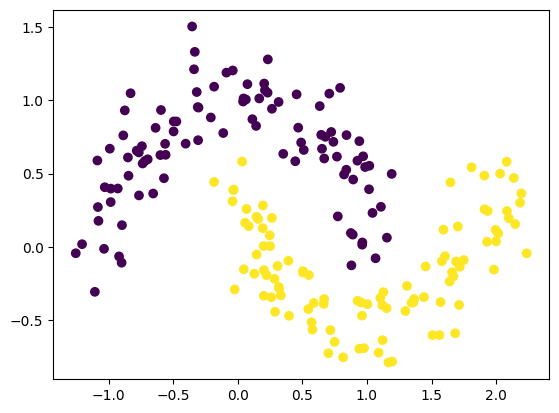

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [4]:
input_neurons = X.shape[1]
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [5]:
def retrieve(model_dict):
    W1 = model_dict["W1"]
    b1 = model_dict["b1"]
    W2 = model_dict["W2"]
    b2 = model_dict["b2"]
    return W1, b1, W2, b2

In [6]:
def forward(X, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return z1, a1, softmax

In [7]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(y.shape[0])
    for i, correct_index in enumerate(y):
        prediction = softmax[i][correct_index]
        m[i] = prediction
    
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss += reg_loss
    return float(loss / y.shape[0])


In [8]:
def predict(X, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(softmax, dim = 1)

In [12]:
def backpropogation(X, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, softmax = forward(X, model_dict)
        delta3 = np.copy(softmax)
        delta3[range(X.shape[0]), y] -= 1 
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)

        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        model_dict = {
            "W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2
        }
        
        if i % 50 == 0:
            print("Loss at Epoch {} is: {:.3f}".format(i, loss(softmax, y, model_dict)))
        
    return model_dict



In [10]:
def init_network(input_dims, hidden_dims, output_dims):
    W1 = np.random.randn(input_dims, hidden_dims) / np.sqrt(input_dims)
    b1 = np.zeros((1, hidden_dims))
    W2 = np.random.randn(hidden_dims, output_dims) / np.sqrt(hidden_dims)
    b2 = np.zeros((1, output_dims))
    model_dict = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return model_dict

In [13]:
model_dict = init_network(input_neurons, 3, output_neurons)
model = backpropogation(X, y, model_dict, 1500)

Loss at Epoch 0 is: 0.969
Loss at Epoch 50 is: 0.399
Loss at Epoch 100 is: 0.337
Loss at Epoch 150 is: 0.327
Loss at Epoch 200 is: 0.328
Loss at Epoch 250 is: 0.330
Loss at Epoch 300 is: 0.333
Loss at Epoch 350 is: 0.334
Loss at Epoch 400 is: 0.336
Loss at Epoch 450 is: 0.338
Loss at Epoch 500 is: 0.340
Loss at Epoch 550 is: 0.343
Loss at Epoch 600 is: 0.346
Loss at Epoch 650 is: 0.348
Loss at Epoch 700 is: 0.351
Loss at Epoch 750 is: 0.353
Loss at Epoch 800 is: 0.355
Loss at Epoch 850 is: 0.356
Loss at Epoch 900 is: 0.357
Loss at Epoch 950 is: 0.358
Loss at Epoch 1000 is: 0.357
Loss at Epoch 1050 is: 0.356
Loss at Epoch 1100 is: 0.355
Loss at Epoch 1150 is: 0.353
Loss at Epoch 1200 is: 0.353
Loss at Epoch 1250 is: 0.352
Loss at Epoch 1300 is: 0.353
Loss at Epoch 1350 is: 0.354
Loss at Epoch 1400 is: 0.355
Loss at Epoch 1450 is: 0.356


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49da15f7-246c-45df-bc8f-6f9233c2b1e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>